# Language Processing 1 (fall 2024)

## Assignment 1: assigned on September 30. 2024  and  to be returned on October 23, 2024, 23:55.

#### The percentages assigned to the exercises are provided to give you an idea of the time/effort it might take to solve them.  

#### You must have at least 70% correct to pass the assignment.

## Exercise 1 (25%):

- Download the ELTeC corpora in English, Spanish, and another language of interest of your choice (hopefully one that you do not speak) from https://zenodo.org/records/4662444. If there are more versions of a language corpus choose the smallest one (level0).
  - English corpus: https://zenodo.org/records/4662490
  - Spanish corpus: https://zenodo.org/records/4662603
  - Other corpora: Check "Related works" in https://zenodo.org/records/4662444
- Read the three corpora (NB: you can use a Python package to read TEI files, e.g. [tei-reader](https://pypi.org/project/tei-reader/))
- Export a raw text corpus of English, Spanish, and the third language you have chosen (called 3-L henceforth).
  - You should save the output in raw text format in three files: en.txt, sp.txt and xx.txt

In [25]:
pip install tei-reader

Note: you may need to restart the kernel to use updated packages.


In [31]:
import os
from tei_reader import TeiReader

def process_file(file_path, reader):
    try:
        corpora = reader.read_file(file_path)
        return corpora.text if hasattr(corpora, 'text') else None
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def save_text_to_file(text, output_file):
    with open(output_file, 'a', encoding='utf-8') as f:
        f.write(text + '\n')

def process_corpus(input_folder, output_file):
    reader = TeiReader()  
    for file in os.listdir(input_folder):  
        if file.endswith('.xml'):  
            file_path = os.path.join(input_folder, file)
            print(f"Processing {file_path}")
            text = process_file(file_path, reader)  
            if text:  
                save_text_to_file(text, output_file)  

english_folder = 'corpora/English/level0'
spanish_folder = 'corpora/Spanish/level1'
ukrainian_folder = 'corpora/Ukrainian/level0'

english_output = 'en.txt'
spanish_output = 'sp.txt'
ukrainian_output = 'uk.txt'

process_corpus(english_folder, english_output)
process_corpus(spanish_folder, spanish_output)
process_corpus(ukrainian_folder, ukrainian_output)



Processing corpora/English/level0/ENG18621_Braddon.xml
Processing corpora/English/level0/ENG18800_Disraeli.xml
Processing corpora/English/level0/ENG18481_Dickens.xml
Processing corpora/English/level0/ENG18610_Eliot.xml
Processing corpora/English/level0/ENG18551_Trollope.xml
Processing corpora/English/level0/ENG18740_Ouida.xml
Processing corpora/English/level0/ENG18961_Griffiths.xml
Processing corpora/English/level0/ENG18900_Doyle.xml
Processing corpora/English/level0/ENG19150_Buchan.xml
Processing corpora/English/level0/ENG18450_Disraeli.xml
Processing corpora/English/level0/ENG18630_Craik.xml
Processing corpora/English/level0/ENG19200_Lawrence.xml
Processing corpora/English/level0/ENG18972_Morris.xml
Processing corpora/Spanish/level1/SPA4020_Colombine_LaRampa.xml
Processing corpora/Spanish/level1/SPA3022_PalacioValdes_LaEspuma.xml
Processing corpora/Spanish/level1/SPA3008_Pereda_PArriba.xml
Processing corpora/Spanish/level1/SPA3007_Pereda_Sotileza.xml
Processing corpora/Spanish/level1

# Exercise 2  (10%):
- Write a tokenizer for the three languages (English, Spanish, and 3-L), based on regexps.
- Print the first 100 tokens for each language.
- Save in a file "EN_mytok_red.txt" the first 2000 tokenized words in English.


In [37]:
import os
import re

def tokenize_english(text):
    tokens = re.findall(r"\b\w+(?:'\w+)?\b", text.lower())
    return tokens

def tokenize_spanish(text):
    tokens = re.findall(r"\b\w+(?:'\w+)?\b", text.lower())
    return tokens

def tokenize_ukrainian(text):
    tokens = re.findall(r"\b[\w\']+\b", text.lower(), re.UNICODE)
    return tokens

def read_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read()

def process_tokenization(input_file, language):
    text = read_file(input_file)
    
    if language == 'english':
        return tokenize_english(text)
    elif language == 'spanish':
        return tokenize_spanish(text)
    elif language == 'ukrainian':
        return tokenize_ukrainian(text)
    else:
        raise ValueError("Unsupported language")

def save_tokens(tokens, filename, num_tokens=2000):
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(' '.join(tokens[:num_tokens]))

english_output = 'en.txt'
spanish_output = 'sp.txt'
ukrainian_output = 'uk.txt'

# Tokenize each language
english_tokens = process_tokenization(english_output, 'english')
spanish_tokens = process_tokenization(spanish_output, 'spanish')
ukrainian_tokens = process_tokenization(ukrainian_output, 'ukrainian')

# Print the first 100 tokens for each language
print("First 100 English tokens:", english_tokens[:100])
print("First 100 Spanish tokens:", spanish_tokens[:100])
print("First 100 Ukrainian tokens:", ukrainian_tokens[:100])

# Save the first 2000 English tokens
save_tokens(english_tokens, 'EN_mytok_red.txt', 2000)


First 100 English tokens: ['lady', "audley's", 'secret', 'by', 'mary', 'elizabeth', 'braddon', 'chapter', 'i', 'lucy', 'it', 'lay', 'down', 'in', 'a', 'hollow', 'rich', 'with', 'fine', 'old', 'timber', 'and', 'luxuriant', 'pastures', 'and', 'you', 'came', 'upon', 'it', 'through', 'an', 'avenue', 'of', 'limes', 'bordered', 'on', 'either', 'side', 'by', 'meadows', 'over', 'the', 'high', 'hedges', 'of', 'which', 'the', 'cattle', 'looked', 'inquisitively', 'at', 'you', 'as', 'you', 'passed', 'wondering', 'perhaps', 'what', 'you', 'wanted', 'for', 'there', 'was', 'no', 'thorough', 'fare', 'and', 'unless', 'you', 'were', 'going', 'to', 'the', 'court', 'you', 'had', 'no', 'business', 'there', 'at', 'all', 'at', 'the', 'end', 'of', 'this', 'avenue', 'there', 'was', 'an', 'old', 'arch', 'and', 'a', 'clock', 'tower', 'with', 'a', 'stupid', 'bewildering']
First 100 Spanish tokens: ['la', 'rampa', 'novela', 'por', 'carmen', 'de', 'burgos', 'colombine', 'renacimiento', 'san', 'marcos', '42', 'madri

 # Exercise 3 (10%)
- Use the NLTK tokenizer and run it on the English corpus.
- Write to the file "EN_NLTK_tok.txt" the first 2000 tokens.
- Compare the content of "EN_mytok_red.txt" and "EN_NLTK_tok.txt" and explain whether and how they differ.


In [ ]:
pip install nltk

In [39]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def read_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read()

def tokenize_nltk(text):
    return word_tokenize(text)

english_tokens = tokenize_nltk(english_text)

def save_tokens(tokens, filename, num_tokens=2000):
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(' '.join(tokens[:num_tokens]))
save_tokens(english_tokens, 'EN_NLTK_tok.txt', 2000)

def read_tokens(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read().split()

mytok_tokens = read_tokens('EN_mytok_red.txt')
nltk_tokens = read_tokens('EN_NLTK_tok.txt')

print("Custom tokenizer first 100 tokens:", mytok_tokens[:100])
print("NLTK tokenizer first 100 tokens:", nltk_tokens[:100])

print("Number of tokens in custom tokenizer:", len(mytok_tokens))
print("Number of tokens in NLTK tokenizer:", len(nltk_tokens))

differences = [i for i, (mytok, nltk_tok) in enumerate(zip(mytok_tokens, nltk_tokens)) if mytok != nltk_tok]
print(f"Number of differing tokens: {len(differences)}")

if differences:
    for diff in differences[:10]:  
        print(f"Custom: {mytok_tokens[diff]}, NLTK: {nltk_tokens[diff]}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/whitesungun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Custom tokenizer first 100 tokens: ['lady', "audley's", 'secret', 'by', 'mary', 'elizabeth', 'braddon', 'chapter', 'i', 'lucy', 'it', 'lay', 'down', 'in', 'a', 'hollow', 'rich', 'with', 'fine', 'old', 'timber', 'and', 'luxuriant', 'pastures', 'and', 'you', 'came', 'upon', 'it', 'through', 'an', 'avenue', 'of', 'limes', 'bordered', 'on', 'either', 'side', 'by', 'meadows', 'over', 'the', 'high', 'hedges', 'of', 'which', 'the', 'cattle', 'looked', 'inquisitively', 'at', 'you', 'as', 'you', 'passed', 'wondering', 'perhaps', 'what', 'you', 'wanted', 'for', 'there', 'was', 'no', 'thorough', 'fare', 'and', 'unless', 'you', 'were', 'going', 'to', 'the', 'court', 'you', 'had', 'no', 'business', 'there', 'at', 'all', 'at', 'the', 'end', 'of', 'this', 'avenue', 'there', 'was', 'an', 'old', 'arch', 'and', 'a', 'clock', 'tower', 'with', 'a', 'stupid', 'bewildering']
NLTK tokenizer first 100 tokens: ['LADY', 'AUDLEY', "'S", 'SECRET', 'By', 'Mary', 'Elizabeth', 'Braddon', 'CHAPTER', 'I.', 'LUCY', '.'

In [32]:
def read_tokens(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read().split()

mytok_tokens = read_tokens('EN_mytok_red.txt')
nltk_tokens = read_tokens('EN_NLTK_tok.txt')

print("Custom tokenizer first 100 tokens:", mytok_tokens[:100])
print("NLTK tokenizer first 100 tokens:", nltk_tokens[:100])

print("Number of tokens in custom tokenizer:", len(mytok_tokens))
print("Number of tokens in NLTK tokenizer:", len(nltk_tokens))

differences = [i for i, (mytok, nltk_tok) in enumerate(zip(mytok_tokens, nltk_tokens)) if mytok != nltk_tok]
print(f"Number of differing tokens: {len(differences)}")

if differences:
    for diff in differences[:10]:  
        print(f"Custom: {mytok_tokens[diff]}, NLTK: {nltk_tokens[diff]}")


Custom tokenizer first 100 tokens: ['lady', "audley's", 'secret', 'by', 'mary', 'elizabeth', 'braddon', 'chapter', 'i', 'lucy', 'it', 'lay', 'down', 'in', 'a', 'hollow', 'rich', 'with', 'fine', 'old', 'timber', 'and', 'luxuriant', 'pastures', 'and', 'you', 'came', 'upon', 'it', 'through', 'an', 'avenue', 'of', 'limes', 'bordered', 'on', 'either', 'side', 'by', 'meadows', 'over', 'the', 'high', 'hedges', 'of', 'which', 'the', 'cattle', 'looked', 'inquisitively', 'at', 'you', 'as', 'you', 'passed', 'wondering', 'perhaps', 'what', 'you', 'wanted', 'for', 'there', 'was', 'no', 'thorough', 'fare', 'and', 'unless', 'you', 'were', 'going', 'to', 'the', 'court', 'you', 'had', 'no', 'business', 'there', 'at', 'all', 'at', 'the', 'end', 'of', 'this', 'avenue', 'there', 'was', 'an', 'old', 'arch', 'and', 'a', 'clock', 'tower', 'with', 'a', 'stupid', 'bewildering']
NLTK tokenizer first 100 tokens: ['LADY', 'AUDLEY', "'S", 'SECRET', 'By', 'Mary', 'Elizabeth', 'Braddon', 'CHAPTER', 'I.', 'LUCY', '.'

## Your explanation here
1. Case Sensitivity
Custom Tokenizer Output:['lady', "audley's", 'secret', ...]
NLTK Tokenizer Output:['LADY', 'AUDLEY', "'S", ...]
Explanation:
The custom tokenizer preserves the lowercase form of words (e.g., "lady"), while NLTK converts certain words to uppercase (e.g., "LADY"). This is particularly noticeable with proper nouns and the first word of sentences, which NLTK capitalizes for consistency.
2. Handling of Contractions and Possessives
Custom Tokenizer Output:"audley's" (treated as a single token)
NLTK Tokenizer Output:"'S" (separated from "AUDLEY")
Explanation:
In the custom tokenizer, "audley's" is kept together as a single token. In contrast, NLTK splits it into two tokens: "AUDLEY" and "'S". This behavior reflects NLTK's more sophisticated handling of possessive forms and contractions.
3. Punctuation Handling
Custom Tokenizer Output:'by', 'mary', 'elizabeth', 'braddon', 'chapter', 'i', 'lucy'
NLTK Tokenizer Output:['By', 'Mary', 'Elizabeth', 'Braddon', 'CHAPTER', 'I.', ...]
Explanation:
In the NLTK output, punctuation marks (like periods and commas) are treated as separate tokens (e.g., "I."). This means that NLTK is more precise in preserving sentence boundaries and overall structure, which is important for tasks involving text analysis.
Overall,the custom tokenizer has a more simplistic approach and tends to retain the original form of the text, while NLTK's tokenizer is more nuanced in its handling of capitalization, punctuation, and contractions.

# Exercise 4 (10%)
- Stem the English corpus using the NLTK Porter stemmer.
- Lemmatize the English corpus using the NLTK WordNetLemmatizer.

- Explain the main differences looking at the first 50 elements (stems vs. lemmas) they produce.

In [42]:
# Insert your code below:
from nltk.stem import PorterStemmer

with open('en.txt', 'r', encoding='utf-8') as file:
    english_text = file.read()

tokens = nltk.word_tokenize(english_text)

porter = PorterStemmer()

stemmed_tokens = [porter.stem(token) for token in tokens[:50]]

print(stemmed_tokens)

['ladi', 'audley', "'s", 'secret', 'by', 'mari', 'elizabeth', 'braddon', 'chapter', 'i.', 'luci', '.', 'it', 'lay', 'down', 'in', 'a', 'hollow', ',', 'rich', 'with', 'fine', 'old', 'timber', 'and', 'luxuri', 'pastur', ';', 'and', 'you', 'came', 'upon', 'it', 'through', 'an', 'avenu', 'of', 'lime', ',', 'border', 'on', 'either', 'side', 'by', 'meadow', ',', 'over', 'the', 'high', 'hedg']


In [43]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens[:50]]

print(lemmatized_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/whitesungun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/whitesungun/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['LADY', 'AUDLEY', "'S", 'SECRET', 'By', 'Mary', 'Elizabeth', 'Braddon', 'CHAPTER', 'I.', 'LUCY', '.', 'It', 'lay', 'down', 'in', 'a', 'hollow', ',', 'rich', 'with', 'fine', 'old', 'timber', 'and', 'luxuriant', 'pasture', ';', 'and', 'you', 'came', 'upon', 'it', 'through', 'an', 'avenue', 'of', 'lime', ',', 'bordered', 'on', 'either', 'side', 'by', 'meadow', ',', 'over', 'the', 'high', 'hedge']


# Your Explanation here (press enter)
1.Output Form:
Stems: Often non-words (e.g., "ladi," "mari").
Lemmas: Proper words with correct capitalization (e.g., "LADY," "Mary").

2.Accuracy:
Stems: Simplified forms that may lose meaning (e.g., "luci" for "Lucy").
Lemmas: Maintain the original meaning and grammatical form.

3.Punctuation Handling:
Stems: Treats punctuation as part of words (e.g., "'s" stays as is).
Lemmas: Keeps punctuation in context (e.g., "'S").

4.Context Sensitivity:
Stems: Do not consider context; reduces words to root forms.
Lemmas: Can provide base forms based on context (though not utilized in your implementation).

Stemming yields non-standard forms that may lack meaning, while lemmatization produces valid words that accurately represent the original text.


# Exercise 5 (20%)
- Plot the frequency distribution and the zipf distribution for the three corpora (English, Spanish, 3-L).
- Explain what they show to you.
- Try to guess how to say "and" in the unknown language (3-L), without using any translation service or dictionary. How did you guess it?



In [46]:
pip install nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


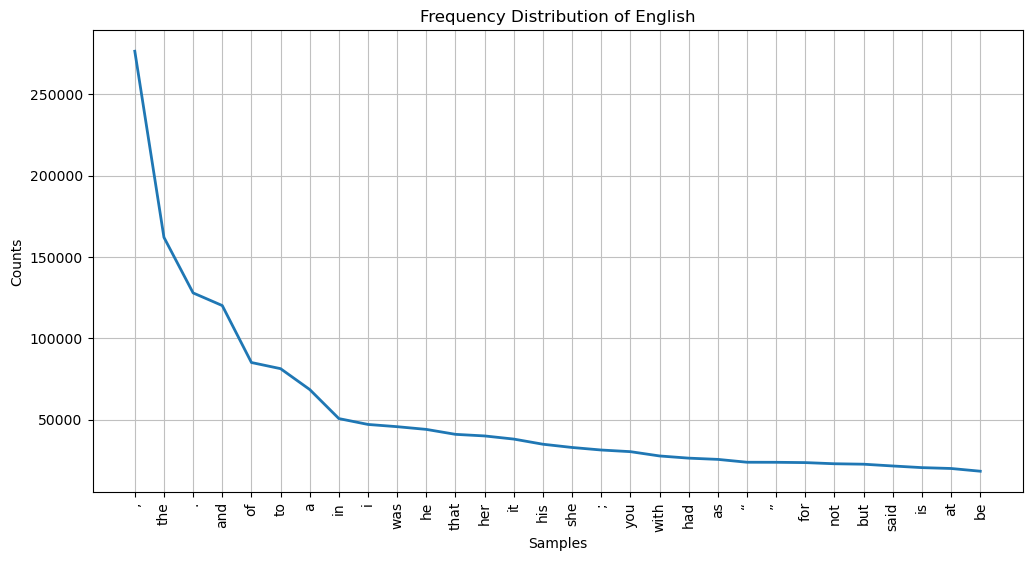

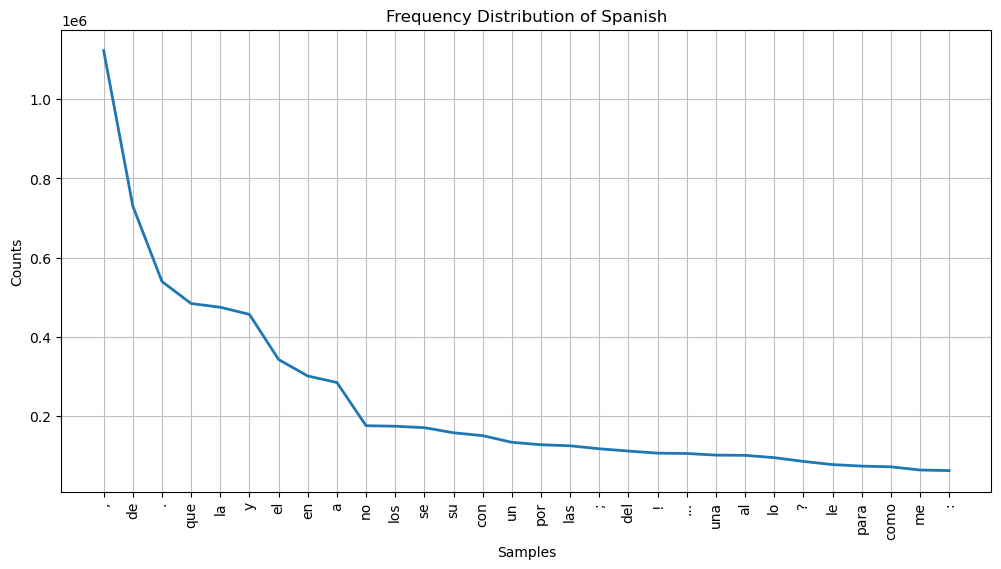

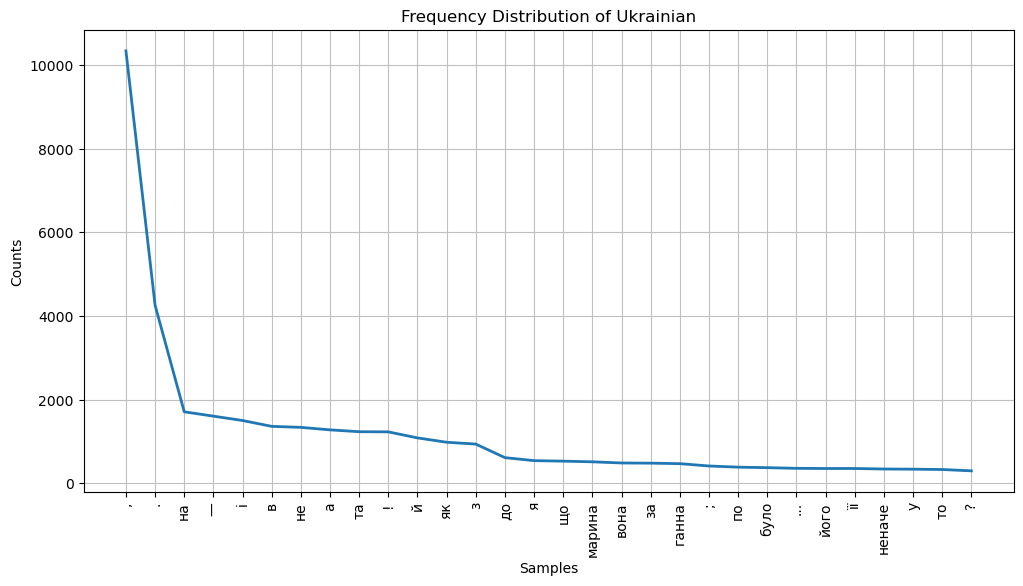

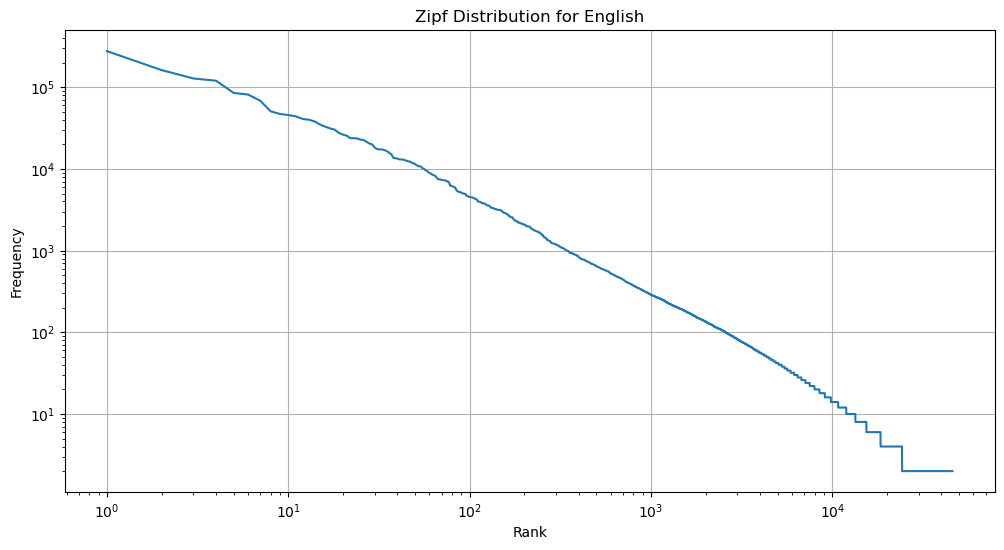

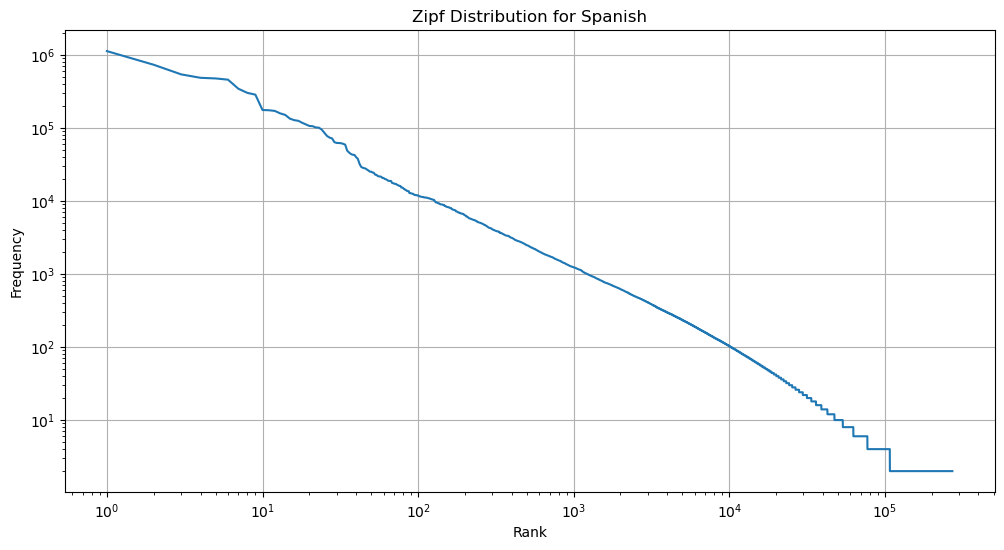

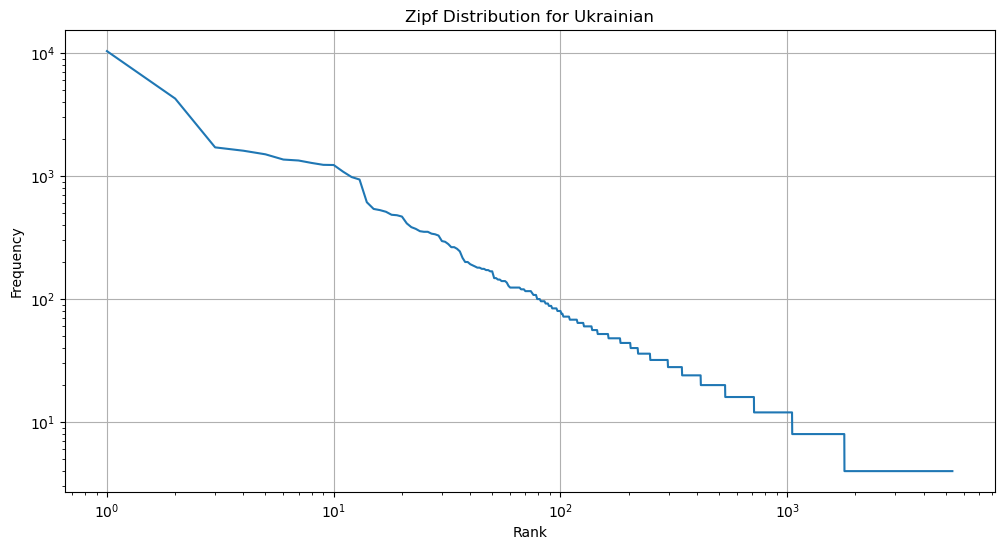

In [71]:
import nltk
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.tokenize import word_tokenize

def read_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read()

english_text = read_file('en.txt')
spanish_text = read_file('sp.txt')
ukrainian_text = read_file('uk.txt')

english_tokens = word_tokenize(english_text.lower())
spanish_tokens = word_tokenize(spanish_text.lower())
ukrainian_tokens = word_tokenize(ukrainian_text.lower())

english_fd = FreqDist(english_tokens)
spanish_fd = FreqDist(spanish_tokens)
ukrainian_fd = FreqDist(ukrainian_tokens)

def plot_frequency_distribution(fd, language):
    plt.figure(figsize=(12, 6))
    fd.plot(30, title=f'Frequency Distribution of {language}', cumulative=False)
    plt.show()

plot_frequency_distribution(english_fd, 'English')
plot_frequency_distribution(spanish_fd, 'Spanish')
plot_frequency_distribution(ukrainian_fd, 'Ukrainian')

def plot_zipf_distribution(fd, language):
    plt.figure(figsize=(12, 6))
    ranks = range(1, len(fd.items()) + 1)
    frequencies = [fd[word] for word in fd.keys()]
    
    sorted_frequencies = sorted(frequencies, reverse=True)
    
    plt.loglog(ranks, sorted_frequencies)
    plt.title(f'Zipf Distribution for {language}')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

plot_zipf_distribution(english_fd, 'English')
plot_zipf_distribution(spanish_fd, 'Spanish')
plot_zipf_distribution(ukrainian_fd, 'Ukrainian')


## Your explanations here (press enter)
In the English corpus, the most frequent words are articles and prepositions like 'the,' 'and,' and 'of,' reflecting the structural components of English sentences. Similarly, in Spanish, words like 'de'(of) ,'que' (that) and 'la' (the) dominate, showing a common pattern in natural language. Also, in Ukarainian, the most frequent word is 'Ha' ,having the meaning of 'there is' in Ehglish. The frequency distribution shows a steep drop after the most common words, with a long tail of words that appear only once or twice, indicating a large number of less frequent words in all three corpora.
    
Zipf’s law is generally followed, as the most common words appear at a much higher frequency, while the frequency sharply declines as we move down the rank, confirming the expected power-law behavior in all three languages.The deviations in the lower ranks of the Zipf plot suggest that these corpora contain many low-frequency words, possibly proper nouns or rare words that don’t conform as strictly to the power-law distribution.    

I guess, in Ukrainian, "and" is "і". The reasons are follwing.
Common Words: "And" is a very common word, so I would expect it to be short.
Phonetic Patterns: I might think it sounds like it has a vowel sound, as many conjunctions do.
Frequency Plot: Noticing "i" is the second most frequent word would suggest it’s likely a common conjunction, leading me to guess it means "and."

# Exercise 6: 10%

For the English corpus:
- Sentence tokenize it via NLTK.
- Remove the stop words (for the English corpus only).
- Print the first 10 sentences.
- Write the pre_processed corpus to the file "EN_preproc.txt"


In [50]:
# Insert your code below:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

sentences = sent_tokenize(english_text)

stop_words = set(stopwords.words('english'))

def remove_stop_words(sentence):
    words = word_tokenize(sentence)
    return ' '.join([word for word in words if word.lower() not in stop_words])

pre_processed_sentences = [remove_stop_words(sentence) for sentence in sentences]

print("First 10 pre-processed sentences:")
for i, sentence in enumerate(pre_processed_sentences[:10]):
    print(f"{i + 1}: {sentence}")

with open('EN_preproc.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(pre_processed_sentences))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guojingkun/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


First 10 pre-processed sentences:
1: LADY AUDLEY 'S SECRET Mary Elizabeth Braddon CHAPTER I. LUCY .
2: lay hollow , rich fine old timber luxuriant pastures ; came upon avenue limes , bordered either side meadows , high hedges cattle looked inquisitively passed , wondering , perhaps , wanted ; thorough-fare , unless going Court business .
3: end avenue old arch clock tower , stupid , bewildering clock , one hand—and jumped straight one hour next—and therefore always extremes .
4: arch walked straight gardens Audley Court .
5: smooth lawn lay , dotted groups rhododendrons , grew perfection anywhere else county .
6: right kitchen gardens , fish-pond , orchard bordered dry moat , broken ruin wall , places thicker high , everywhere overgrown trailing ivy , yellow stonecrop , dark moss .
7: left broad graveled walk , , years ago , place convent , quiet nuns walked hand hand ; wall bordered espaliers , shadowed one side goodly oaks , shut flat landscape , circled house gardens darkening shelt

# Exercise 7: 5%
- Explain what is normalization of text

## Your answer here (press enter)
Text normalization is the process of converting words into a standard format to ensure consistency. It involves:

Case Folding: Converting text to all lowercase or uppercase (e.g., "LARGE" to "large").
Word Variants: Standardizing forms of a word (e.g., "has" and "have" to "have").
Punctuation: Removing or simplifying punctuation (e.g., "U.S.A." to "USA").

This makes text easier to process and analyze.

# Exercise 8 (10%)
- Run the Universal PoS-tagger on the tokenized English text and print how many substantives there are.

In [85]:
# Insert your code below:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

tagged_tokens = nltk.pos_tag(tokens, tagset='universal')

substantive_count = sum(1 for word, pos in tagged_tokens if pos == 'NOUN')

print(f"Number of substantives: {substantive_count}")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/whitesungun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/whitesungun/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Number of substantives: 757026


### The end!

Thanks for doing this assignment. We hope you enjoyed it. In the following assignments we will use the same corpus.